In [3]:
pip install qtpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install opencv-python-headless
!pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 140.3 kB/s eta 0:04:36
   ---------------------------------------- 0.1/38.8 MB 308.0 kB/s eta 0:02:06
   ---------------------------------------- 0.3/38.8 MB 948.8 kB/s eta 0:00:41
    --------------------------------------- 0.6/38.8 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 1.0/38.8 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.0/38.8 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.1/38.8 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.1/38.8 MB 2.2 MB/s eta 0:00:18
   - -----------------------

In [4]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:

mp_pose = mp.solutions.pose


pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)


mp_drawing = mp.solutions.drawing_utils 

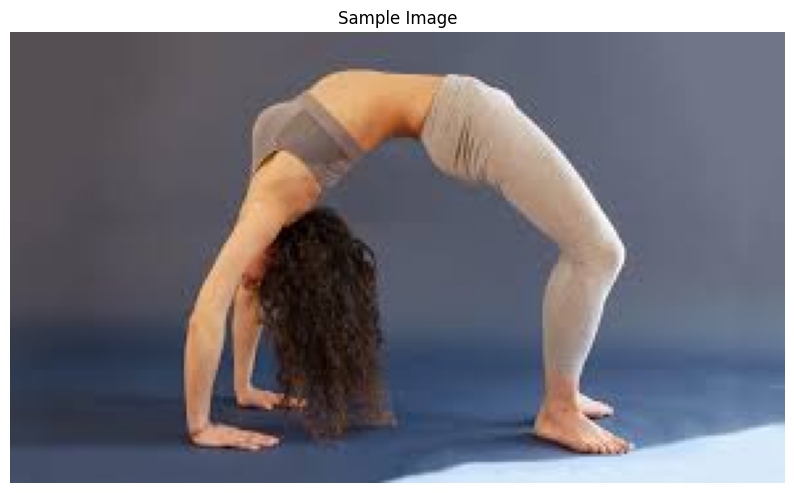

In [6]:
sample_img = cv2.imread('yoga pose.jpeg')

plt.figure(figsize = [10, 10])

#convert BGR to RGB 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [7]:
# Perform pose detection
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
if results.pose_landmarks:
    # Iterate over 5 landmarks (nose, left eye inner, left eye, left eye outer, right eye inner) ,just to have a glance of coordinates
    for i in range(5):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.303693652
y: 0.559857726
z: -0.0245191511
visibility: 0.994622

LEFT_EYE_INNER:
x: 0.321924835
y: 0.573119879
z: -0.00915578
visibility: 0.994390309

LEFT_EYE:
x: 0.324504793
y: 0.568861306
z: -0.00966381188
visibility: 0.992628574

LEFT_EYE_OUTER:
x: 0.327179283
y: 0.564203918
z: -0.00946224295
visibility: 0.995823622

RIGHT_EYE_INNER:
x: 0.32239303
y: 0.57213223
z: -0.0458950624
visibility: 0.99682188



c:\Users\lavya\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [8]:
#convert the 5 normalized landmarks displayed above into their original scale by using the width and height of the image

image_height, image_width, _ = sample_img.shape

if results.pose_landmarks:
    
    for i in range(5):
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 89.28593373298645
y: 95.73567116260529
z: -7.208630416542292
visibility: 0.994621992111206

LEFT_EYE_INNER:
x: 94.64590162038803
y: 98.00349926948547
z: -2.6917993426322937
visibility: 0.9943903088569641

LEFT_EYE:
x: 95.40440905094147
y: 97.27528327703476
z: -2.8411606941372156
visibility: 0.9926285743713379

LEFT_EYE_OUTER:
x: 96.19070917367935
y: 96.47886997461319
z: -2.7818994261324406
visibility: 0.9958236217498779

RIGHT_EYE_INNER:
x: 94.78355079889297
y: 97.83461129665375
z: -13.49314834177494
visibility: 0.9968218803405762



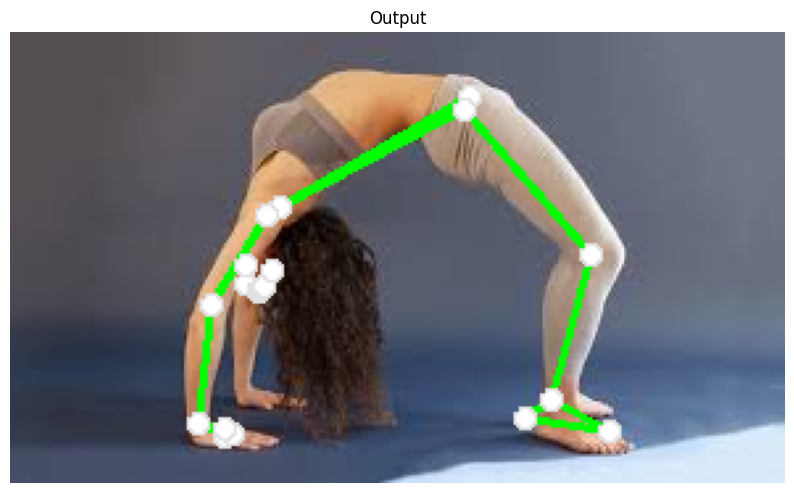

In [19]:
# draw the detected landmarks on the sample image

img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image=img_copy,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)
    )


    fig = plt.figure(figsize = [10, 10])

    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

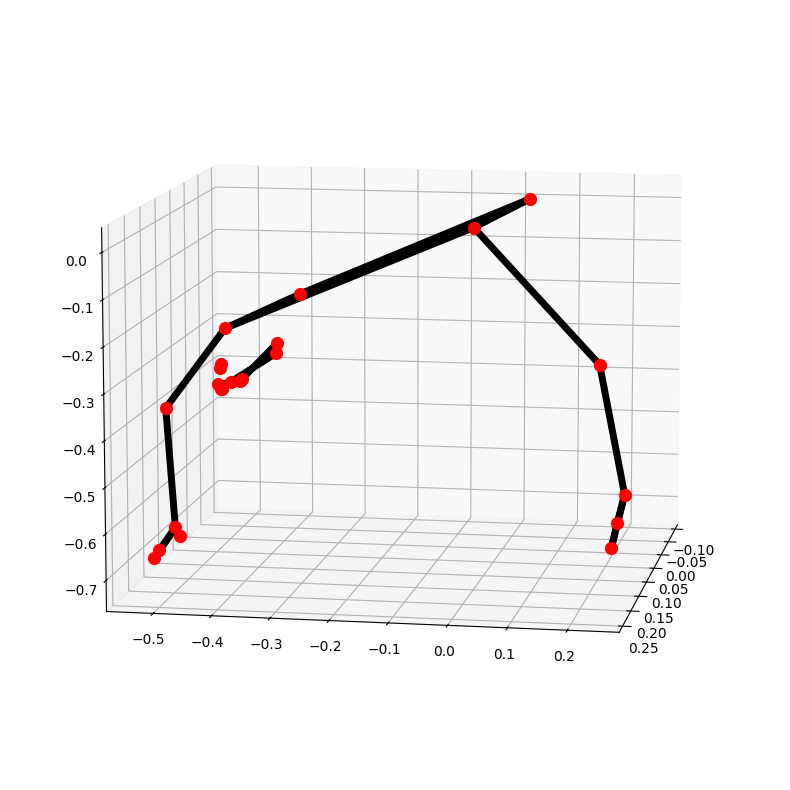

In [9]:
# visualize the landmarks in three-dimensions (3D) using the function mp.solutions.drawing_utils.plot_landmarks().

mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [10]:
def detectPose(image, pose, display=True):
    '''
        Input:
        image: The input image with a person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot
        Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # list to store the detected landmarks.
    landmarks = []
    
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
       
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
        
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Input Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        #Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    else:
        return output_image, landmarks

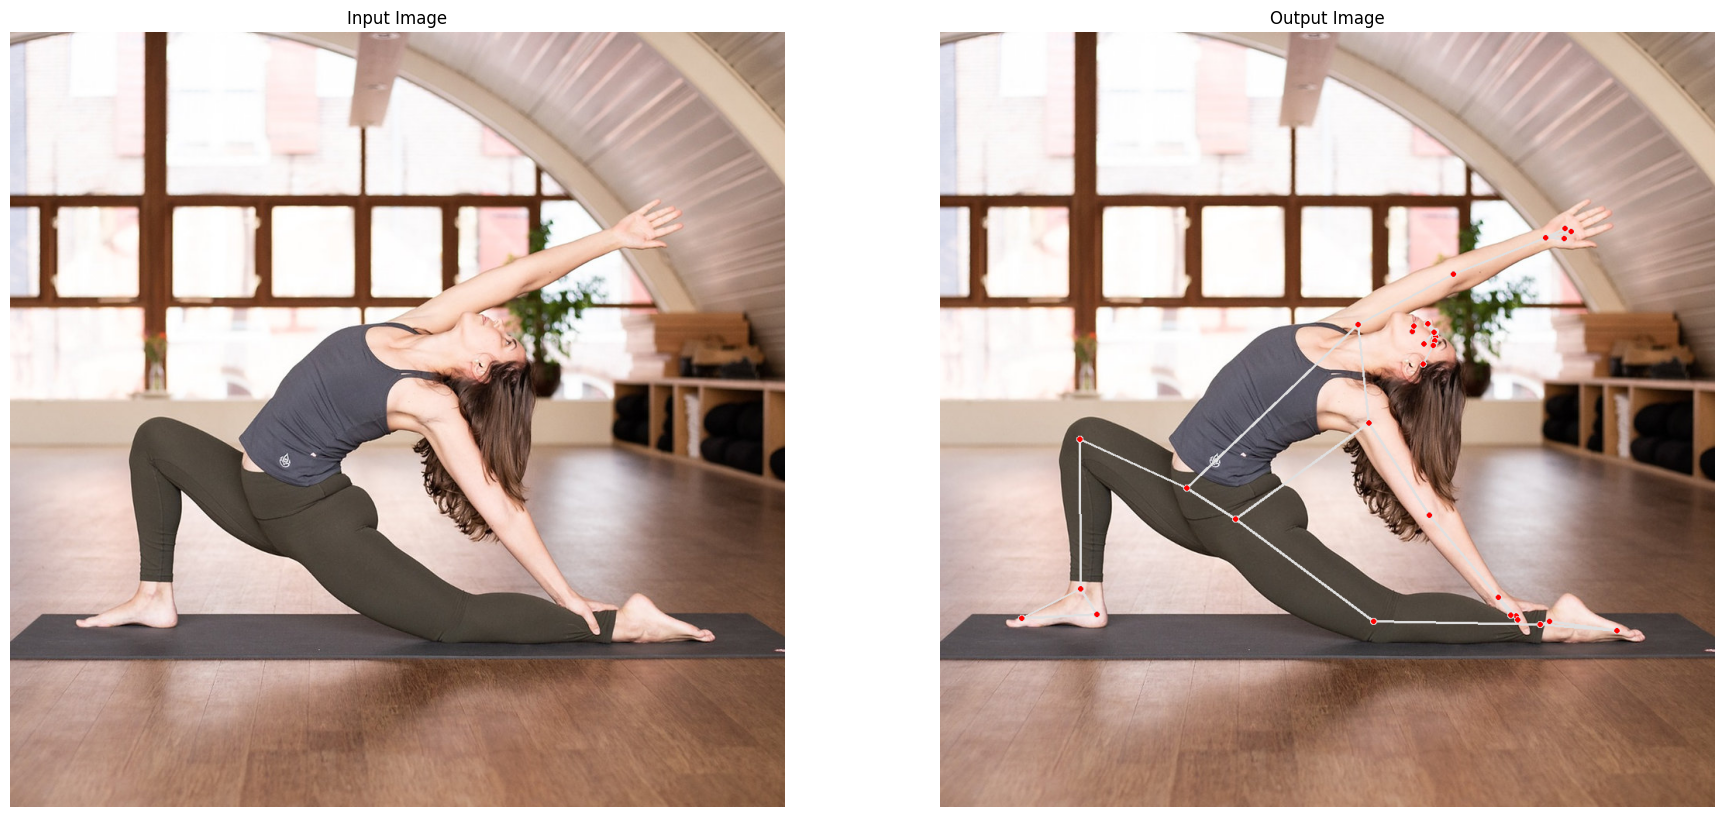

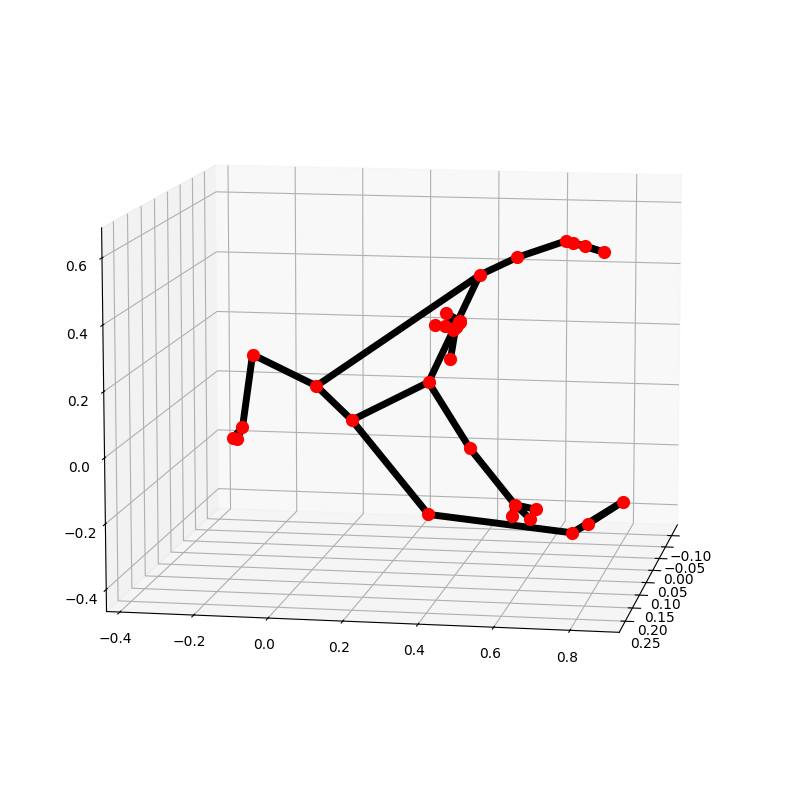

In [11]:
image = cv2.imread('yoga pose 2.jpg')
detectPose(image, pose, display=True)

In [13]:
# now we will try the function on a real-time webcam feed and a video

# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)
video = cv2.VideoCapture(0)

video.set(3,1280)
video.set(4,960)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the video is accessed successfully.
while video.isOpened():

    ok, frame = video.read()
    
    if not ok:
        break

    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()

    if (time2 - time1) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Pose Detection', frame)

    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object.
video.release()

# Close the windows.
cv2.destroyAllWindows()

In [12]:
# Create a Function to Calculate Angle between Landmarks
def calculateAngle(landmark1, landmark2, landmark3):
    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

    if angle < 0:

        # Add 360 to the found angle.
        angle += 360

    return angle

In [13]:
# example for testing
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [30]:
# defining separate functions for individual yoga poses specifications

def is_warrior_ii_pose(left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_knee_angle, right_knee_angle):
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                    return True
    return False

def is_t_pose(left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_knee_angle, right_knee_angle):
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
                return True
    return False

def is_tree_pose(left_knee_angle, right_knee_angle):
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:
            return True
    return False

def is_downward_dog_pose(left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
    if (((left_shoulder_angle > 160 and left_shoulder_angle < 200) or 
        (right_shoulder_angle > 160 and right_shoulder_angle < 200)) and
        ((left_hip_angle > 75 and left_hip_angle < 105) or
        (right_hip_angle > 75 and right_hip_angle < 105)) and
        ((left_knee_angle > 160 and left_knee_angle < 200) or
        (right_knee_angle > 160 and right_knee_angle < 200))):
        return True
    return False

def is_plank_pose(left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
    if (((left_shoulder_angle > 70 and left_shoulder_angle < 110) or 
        (right_shoulder_angle > 70 and right_shoulder_angle < 110)) and
        ((left_hip_angle > 160 and left_hip_angle < 200) or
        (right_hip_angle > 160 and right_hip_angle < 200)) and
        ((left_knee_angle > 160 and left_knee_angle < 200) or
        (right_knee_angle > 160 and right_knee_angle < 200))):
        return True
    return False

def is_chair_pose(left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
    if (((left_hip_angle > 60 and left_hip_angle < 100) or
        (right_hip_angle > 60 and right_hip_angle < 100)) and
        ((left_knee_angle > 60 and left_knee_angle < 90) or
        (right_knee_angle > 60 and right_knee_angle < 90))):
        return True
    return False


In [31]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.
    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    # Calculate the left hip angle.
    left_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value])
    
    # Calculate the right hip angle.
    right_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value])
    
    # Check for specific poses.
    if is_warrior_ii_pose(left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_knee_angle, right_knee_angle):
        label = 'Warrior II Pose'
    elif is_t_pose(left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_knee_angle, right_knee_angle):
        label = 'T Pose'
    elif is_tree_pose(left_knee_angle, right_knee_angle):
        label = 'Tree Pose'
    elif is_downward_dog_pose(left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
        label='Downward Dog Pose'
    elif is_plank_pose(left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
        label='Plank Pose'
    elif is_chair_pose(left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
        label='Chair Pose'

    # Update color if pose is recognized
    if label != 'Unknown Pose':
        color = (0, 255, 0)
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Display or return the result
    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output Image")
        plt.axis('off')
    else:
        return output_image, label


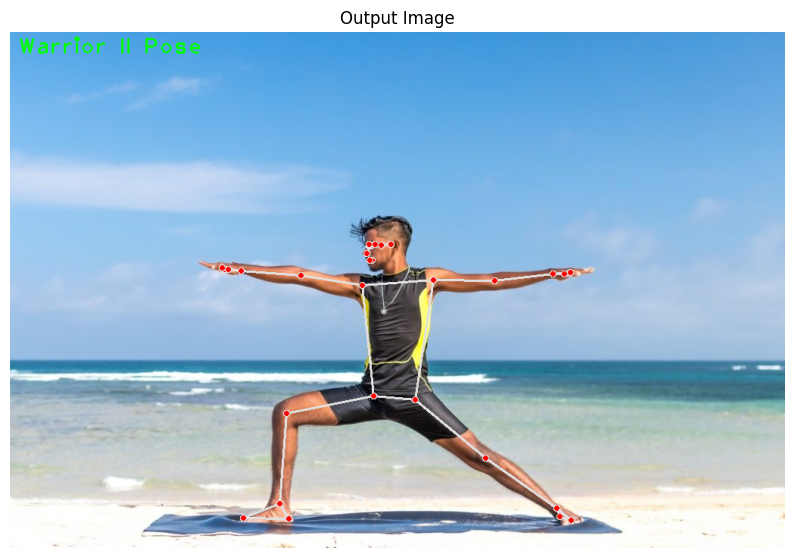

In [16]:
image = cv2.imread('warriorIIpose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

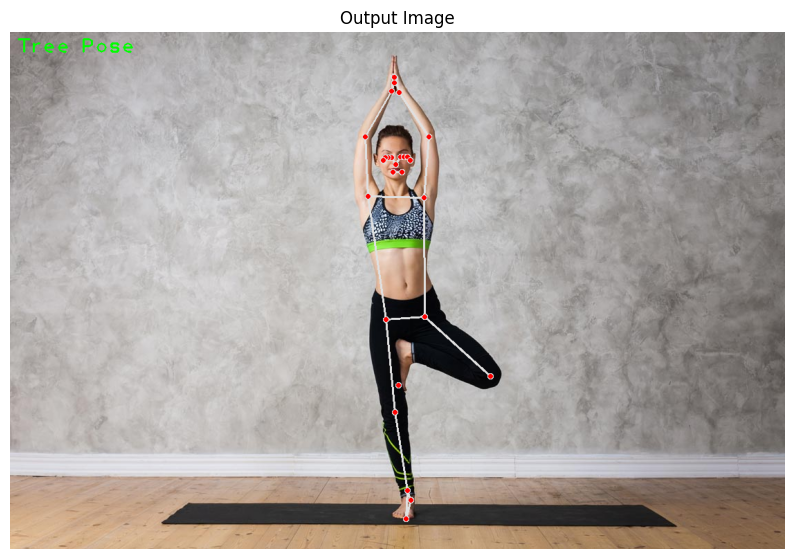

In [17]:
image = cv2.imread('tree-pose-vriksasana.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

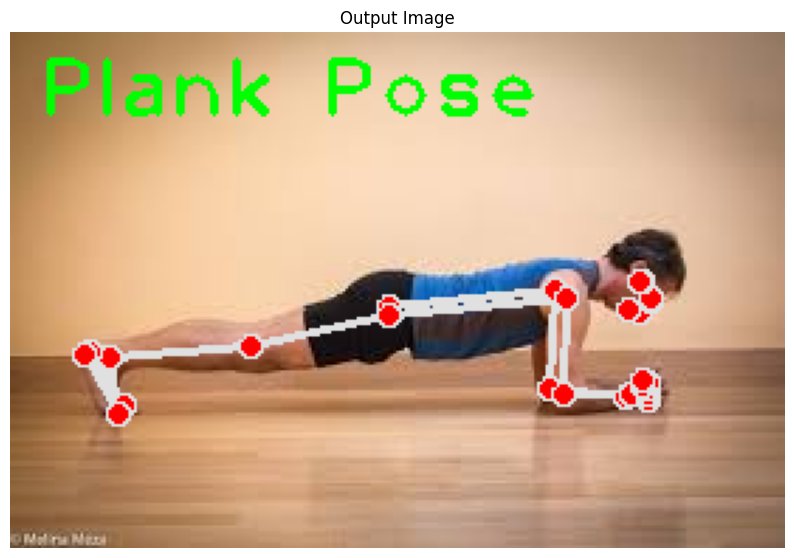

In [18]:
image = cv2.imread('plank_pose.jpeg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [32]:
#pose detection from web cam in real time

pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Check if the landmarks are detected.
    if landmarks:
        
        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()